## импорт библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Загрузка csv
 

In [2]:
df = pd.read_csv('C:\\Users\\lenovo\\final\\all')

In [3]:
df.shape

(1734610, 15)

In [4]:
df.head()

,Unnamed: 0,session_id,target,client_id,visit_date,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,geo_country,geo_city
0,0,1000009318903347362.1632663668.1632663668,0,2.328328e+08,2021-09-26,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,PkybGvWbaqORmxjNunqZ,NaN,mobile,NaN,Samsung,Russia,Gelendzhik
1,1,1000010177899156286.1635013443.1635013443,0,2.328330e+08,2021-10-23,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Samsung,Russia,Voronezh
2,2,1000013386240115915.1635402956.1635402956,0,2.328338e+08,2021-10-28,ZpYIoDJMcFzVoPFsHGJL,banner,gecBYcKZCPMcVYdSSzKP,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Samsung,Russia,Cherkessk
3,3,1000017303238376207.1623489300.1623489300,0,2.328347e+08,2021-06-12,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Realme,Russia,Irkutsk
4,4,1000020580299877109.1624943350.1624943350,0,2.328354e+08,2021-06-29,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Apple,Russia,Moscow


## Органический и платный трафик

In [5]:
df.utm_medium.value_counts(dropna=False)

utm_medium
banner               525206
cpc                  399395
(none)               277060
cpm                  229791
referral             136851
organic               55009
email                 28287
push                  27710
stories               10472
cpv                    7815
blogger_channel        7731
smartbanner            6501
blogger_stories        4226
tg                     3920
cpa                    3266
NaN                    2344
post                   2227
outlook                1269
app                    1211
smm                    1194
clicks                  908
blogger_header          760
(not set)               405
info_text               335
sms                     194
landing                 127
partner                  95
link                     52
cbaafe                   43
CPM                      36
yandex_cpc               31
vk_smm                   25
static                   17
google_cpc               15
article                  15
web_polka

In [6]:
df['utm_medium'] = df.utm_medium.fillna('(none)')

In [7]:
df.utm_medium.isna().sum()

0

1) Органический трафик не отличается от платного с точки зрения CR (Conversion Rate) в целевые события.

In [8]:
org_trafic = ['organic', 'referral', '(none)']

In [9]:
df['trafic'] = df['utm_medium'].apply(lambda x: 'org' if x in org_trafic else 'paid')

In [10]:
df.trafic.value_counts()

trafic
paid    1263346
org      471264
Name: count, dtype: int64

In [11]:
org = df.loc[df['trafic']=='org']
paid = df.loc[df['trafic']=='paid']

In [12]:
org_0 = org.groupby('visit_date', as_index=False)['target'].count()
org_0

,visit_date,target
0,2021-05-19,697
1,2021-05-21,805
2,2021-05-22,693
3,2021-05-23,873
4,2021-05-24,38834
...,...,...
221,2021-12-27,2349
222,2021-12-28,1961
223,2021-12-29,1465
224,2021-12-30,1107


In [13]:
org_1 = org.groupby('visit_date', as_index=False)['target'].sum()
org_1

,visit_date,target
0,2021-05-19,50
1,2021-05-21,0
2,2021-05-22,10
3,2021-05-23,40
4,2021-05-24,2524
...,...,...
221,2021-12-27,38
222,2021-12-28,24
223,2021-12-29,27
224,2021-12-30,18


In [14]:
res_org = org_0.merge(org_1, on='visit_date')
res_org

,visit_date,target_x,target_y
0,2021-05-19,697,50
1,2021-05-21,805,0
2,2021-05-22,693,10
3,2021-05-23,873,40
4,2021-05-24,38834,2524
...,...,...,...
221,2021-12-27,2349,38
222,2021-12-28,1961,24
223,2021-12-29,1465,27
224,2021-12-30,1107,18


In [15]:
res_org['CR'] = res_org['target_y']/res_org['target_x'] * 100
res_org

,visit_date,target_x,target_y,CR
0,2021-05-19,697,50,7.173601
1,2021-05-21,805,0,0.000000
2,2021-05-22,693,10,1.443001
3,2021-05-23,873,40,4.581901
4,2021-05-24,38834,2524,6.499459
...,...,...,...,...
221,2021-12-27,2349,38,1.617710
222,2021-12-28,1961,24,1.223865
223,2021-12-29,1465,27,1.843003
224,2021-12-30,1107,18,1.626016


In [16]:
paid_0 = paid.groupby('visit_date', as_index=False)['target'].count()
paid_1 = paid.groupby('visit_date', as_index=False)['target'].sum()

In [17]:
res_paid = paid_0.merge(paid_1, on='visit_date')
res_paid

,visit_date,target_x,target_y
0,2021-05-19,6,0
1,2021-05-21,21,0
2,2021-05-22,68,1
3,2021-05-23,236,6
4,2021-05-24,396,12
...,...,...,...
221,2021-12-27,8807,195
222,2021-12-28,9812,215
223,2021-12-29,10891,192
224,2021-12-30,11191,152


In [18]:
res_paid['CR'] = res_paid['target_y']/res_org['target_x'] * 100
res_paid

,visit_date,target_x,target_y,CR
0,2021-05-19,6,0,0.000000
1,2021-05-21,21,0,0.000000
2,2021-05-22,68,1,0.144300
3,2021-05-23,236,6,0.687285
4,2021-05-24,396,12,0.030901
...,...,...,...,...
221,2021-12-27,8807,195,8.301405
222,2021-12-28,9812,215,10.963794
223,2021-12-29,10891,192,13.105802
224,2021-12-30,11191,152,13.730804


### Статистические тесты

In [19]:
from scipy import stats

нулевая гипотеза: между органическим и платным трафиком с точки зрения CR(Conversion Rate) нет значимого отличия.

In [20]:
stats.shapiro(res_org.CR)

ShapiroResult(statistic=0.9760785433216848, pvalue=0.0007058685302841293)

In [21]:
stats.shapiro(res_paid.CR)

ShapiroResult(statistic=0.8545405898380679, pvalue=8.460329832970834e-14)

распределение в выборках считаем нормальным

In [22]:
stats.levene(res_org.CR, res_paid.CR)

LeveneResult(statistic=61.41219793744845, pvalue=3.372064800220436e-14)

In [23]:
stats.ttest_ind(res_org.CR, res_paid.CR, equal_var=False)

TtestResult(statistic=-11.758142343569492, pvalue=2.7980014746202135e-26, df=284.47019484773426)

p-value меньше 0,05, то мы не можем принять нулевую гипотезу о том, что  между органическим и платным трафиком с точки зрения CR(Conversion Rate) нет значимого отличия. Принимаем альтернативную гипотезу: между органическим и платным трафиков есть значимые отличия с точки зрения CR.

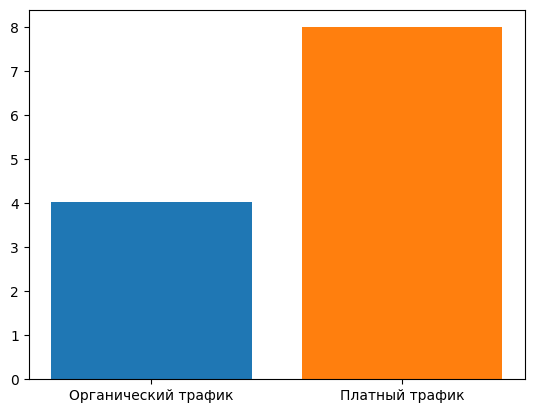

In [24]:
cr_org = res_org['CR'].mean()
cr_paid = res_paid['CR'].mean()
plt.bar('Органический трафик', cr_org)
plt.bar('Платный трафик', cr_paid);


Для наглядности графика используем среднее значение конверсии. Конверсия платного трафика выше

## Мобильный и декстопный трафик

2) Трафик с мобильных устройств не отличается от трафика
с десктопных устройств с точки зрения CR (Conversion Rate)
в целевые события.

In [25]:
df.device_category.value_counts(dropna=False)

device_category
mobile     1368679
desktop     346891
tablet       16696
NaN           2344
Name: count, dtype: int64

In [26]:
mob = df.loc[df['device_category']=='mobile']
desk = df.loc[df['device_category'] == 'desktop']

In [27]:
mob_0 = mob.groupby('visit_date', as_index=False)['target'].count()
mob_0

,visit_date,target
0,2021-05-19,315
1,2021-05-21,389
2,2021-05-22,502
3,2021-05-23,766
4,2021-05-24,23475
...,...,...
221,2021-12-27,9558
222,2021-12-28,10218
223,2021-12-29,10622
224,2021-12-30,10004


In [28]:
mob_1 = mob.groupby('visit_date', as_index=False)['target'].sum()
mob_1

,visit_date,target
0,2021-05-19,22
1,2021-05-21,0
2,2021-05-22,7
3,2021-05-23,32
4,2021-05-24,1513
...,...,...
221,2021-12-27,195
222,2021-12-28,220
223,2021-12-29,200
224,2021-12-30,158


In [29]:
res_mob = mob_0.merge(mob_1, on='visit_date')
res_mob

,visit_date,target_x,target_y
0,2021-05-19,315,22
1,2021-05-21,389,0
2,2021-05-22,502,7
3,2021-05-23,766,32
4,2021-05-24,23475,1513
...,...,...,...
221,2021-12-27,9558,195
222,2021-12-28,10218,220
223,2021-12-29,10622,200
224,2021-12-30,10004,158


In [30]:
res_mob['CR'] = res_mob['target_y']/res_mob['target_x']*100
res_mob

,visit_date,target_x,target_y,CR
0,2021-05-19,315,22,6.984127
1,2021-05-21,389,0,0.000000
2,2021-05-22,502,7,1.394422
3,2021-05-23,766,32,4.177546
4,2021-05-24,23475,1513,6.445154
...,...,...,...,...
221,2021-12-27,9558,195,2.040176
222,2021-12-28,10218,220,2.153063
223,2021-12-29,10622,200,1.882885
224,2021-12-30,10004,158,1.579368


In [31]:
desk_0 = desk.groupby('visit_date', as_index=False)['target'].count()
desk_0

,visit_date,target
0,2021-05-19,385
1,2021-05-21,432
2,2021-05-22,250
3,2021-05-23,336
4,2021-05-24,15401
...,...,...
221,2021-12-27,1511
222,2021-12-28,1467
223,2021-12-29,1615
224,2021-12-30,2174


In [32]:
desk_1 = desk.groupby('visit_date', as_index=False)['target'].sum()
desk_1

,visit_date,target
0,2021-05-19,28
1,2021-05-21,0
2,2021-05-22,4
3,2021-05-23,14
4,2021-05-24,1001
...,...,...
221,2021-12-27,37
222,2021-12-28,19
223,2021-12-29,16
224,2021-12-30,9


In [33]:
res_desk = desk_0.merge(desk_1, on='visit_date')
res_desk

,visit_date,target_x,target_y
0,2021-05-19,385,28
1,2021-05-21,432,0
2,2021-05-22,250,4
3,2021-05-23,336,14
4,2021-05-24,15401,1001
...,...,...,...
221,2021-12-27,1511,37
222,2021-12-28,1467,19
223,2021-12-29,1615,16
224,2021-12-30,2174,9


In [34]:
res_desk['CR'] = res_desk['target_y']/res_desk['target_x']*100
res_desk

,visit_date,target_x,target_y,CR
0,2021-05-19,385,28,7.272727
1,2021-05-21,432,0,0.000000
2,2021-05-22,250,4,1.600000
3,2021-05-23,336,14,4.166667
4,2021-05-24,15401,1001,6.499578
...,...,...,...,...
221,2021-12-27,1511,37,2.448709
222,2021-12-28,1467,19,1.295160
223,2021-12-29,1615,16,0.990712
224,2021-12-30,2174,9,0.413983


### Статистические тесты

нулевая гипотеза: Трафик с мобильных устройств не отличается от трафика с десктопных устройств с точки зрения CR (Conversion Rate) в целевые события.

In [35]:
stats.shapiro(res_desk.CR)

ShapiroResult(statistic=0.8776527165808868, pvalue=1.5786245776299616e-12)

In [36]:
stats.shapiro(res_mob.CR)

ShapiroResult(statistic=0.9079796632354868, pvalue=1.3852877486351955e-10)

подчиняются нормальному распределению

In [37]:
stats.levene(res_mob.CR, res_desk.CR)

LeveneResult(statistic=21.13155055385666, pvalue=5.578741857028141e-06)

In [38]:
stats.ttest_ind(res_mob.CR, res_desk.CR, equal_var=False)

TtestResult(statistic=-2.3546719948400856, pvalue=0.019064448736842935, df=367.4660883858422)

p-value меньше 0,05, то мы не можем принять нулевую гипотезу о том, что  трафик с мобильных устройств не отличается от трафика с десктопных устройств с точки зрения CR (Conversion Rate) в целевые события. Принимаем альтернативную гипотезу: трафик с мобильных устройств отличается от трафика с десктопных устройств с точки зрения CR (Conversion Rate) в целевые события. 


In [39]:
cr_mob = res_mob['CR'].mean()
cr_desk = res_desk['CR'].mean()


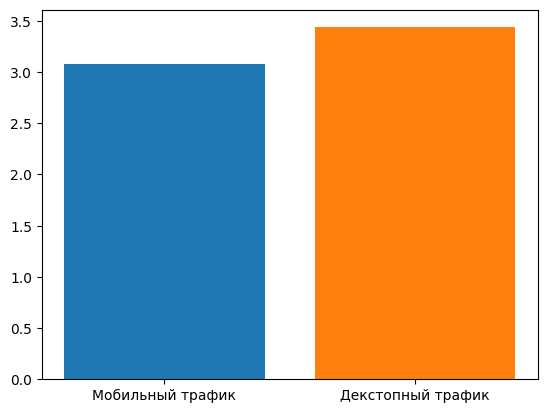

In [40]:
plt.bar('Мобильный трафик', cr_mob)
plt.bar('Декстопный трафик', cr_desk);

Трафик идущий с декстопных устройств показывает конверсию выше, чем трафик с мобильных устройств

3. Трафик из городов присутствия (Москва и область, Санкт-Петербург)
не отличается от трафика из иных регионов с точки зрения CR
(Conversion Rate) в целевые события.

## Трафик по городам присутствия

In [41]:
df.geo_country.value_counts(dropna=False)

geo_country
Russia           1682423
Ukraine             8455
United States       8141
Belarus             3432
NaN                 2344
                  ...   
New Caledonia          1
Paraguay               1
Sierra Leone           1
Barbados               1
Guernsey               1
Name: count, Length: 160, dtype: int64

In [42]:
df_rus = df[(df['geo_country'] == 'Russia')]
df_rus.shape

(1682423, 16)

In [43]:
df_rus.geo_city.value_counts(dropna=False)

geo_city
Moscow                        750928
Saint Petersburg              278402
(not set)                      65755
Yekaterinburg                  33555
Krasnodar                      30260
                               ...  
Troitsk                            1
Slavyanka                          1
9992                               1
8756                               1
Aleksandrovsk-Sakhalinskiy         1
Name: count, Length: 505, dtype: int64

In [44]:
df_rus['geo_city'] = df.geo_city.str.lower()
df_rus.geo_city

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9640\1465172164.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rus['geo_city'] = df.geo_city.str.lower()


0                gelendzhik
1                  voronezh
2                 cherkessk
3                   irkutsk
4                    moscow
                 ...       
1734605              moscow
1734606    saint petersburg
1734607     nizhny novgorod
1734608         chelyabinsk
1734609    zheleznodorozhny
Name: geo_city, Length: 1682423, dtype: object

In [45]:
MO = ["Avsyunino", "Andreevka", "Aprelevka", "Arhangel'skoe", "Atepcevo", "Ashukino", "Balashiha", "Barviha", "Beloozyorskij", "Biokombinat",
       "Bol'shoe Bun'kovo", "Bronnicy", "Bykovo", "Vereya", "Verbilki", "Vidnoe", "Vinogradovo", "Vlasiha", "VNIISSOK", "Vnukovo", "Volokolamsk",
    "Vorovskogo", "Voskresensk", "Vysokovsk", "Gzhel'", "Glebovskij", "Golicyno", "Gorki", "Davydovo", "Dedenevo", "Dedovsk", "Demihovo",
    "Dzerzhinskij", "Dmitrov", "Dolgoprudnyj", "Domodedovo", "Dorohovo", "Drezna", "Dubna", "Egor'evsk", "ZHavoronki", "ZHeleznodorozhnyj",
    "ZHilevo", "ZHukovskij", "Zagoryanskij", "Zaprudnya", "Zarajsk", "Zvezdnyj gorodok", "Zvenigorod", "Zelenograd", "Ivanteevka",
    "Iksha", "Il'inskij", "Istra", "Kalininec", "Kapustino", "Kashira", "Klimovsk", "Klin", "Kokoshkino", "Kolomna", "Kolyubakino",
    "Kommunarka", "Konobeevo", "Korolev", "Kostrovo", "Kotel'niki", "Kraskovo", "Krasnoarmejsk", "Krasnogorsk", "Krasnozavodsk",
    "Krasnoznamensk", "Kratovo", "Kubinka", "Kudinovo", "Kuznecy", "Kurovskoe", "Lesnoj gorodok", "Likino-Dulevo", "Litvinovo", "Lobnya",
    "Losino-Petrovskij", "Lotoshino", "Luhovicy", "Lytkarino", "L'vovskij", "Lyubercy", "Lyubuchany", "Malahovka", "Malino", "Marfino",
    "Mendeleevo", "Mitino", "Mihnevo", "Mozhajsk", "Molodezhnyj", "Monino", "Moscow", "Moskovskij", "Mytishchi", "Naro-Fominsk", "Nahabino",
"Nekrasovskij", "Nesterovo", "Novopetrovskoe", "Novosin'kovo", "Novyj Gorodok", "Noginsk", "Obolensk", "Obuhovo", "Odincovo", "Ozherel'e", 
"Ozery", "Oktyabr'skij", "Orekhovo-Zuevo", "Ostashevo", "Otradnoe", "Ostrovcy", "Pavlovskaya Sloboda", "Pavlovskij Posad", "Peresvet", 
"Pirogovo", "Povarovo", "Podol'sk", "Pravdinskij", "Proletarskij", "Protvino", "Putilkovo", "Pushkino", "Pushchino", "Ramenskoe", "Rastunovo",
"Remmash", "Reutov", "Rogachevo", "Rodniki", "Rozhdestveno", "Roshal'", "Ruza", "Sverdlovskij", "Selyatino", "Sergiev Posad", "Serebryanye Prudy",
"Serpuhov", "Snegiri", "Solnechnogorsk", "Solncevo", "Sofrino", "Staraya Kupavna", "Staryj Gorodok", "Stolbovaya", "Stupino", "Sychevo", 
"Skhodnya", "Taldom", "Taraskovo", "Tomilino", "Troick", "Troickoe", "Tuchkovo", "Uvarovka", "Udel'naya", "Uzunovo", "Fryazevo", "Fryazino",
"Fryanovo", "Himki", "Hot'kovo", "CHascy", "CHernogolovka", "CHekhov", "SHatura", "SHaturtorf", "SHahovskaya", "SHCHelkovo", "SHCHerbinka",
"Elektrogorsk", "Elektrostal'", "Elektrougli", "YUbilejnyj", "YAhroma", "Saint Petersburg"]

In [46]:
new_MO = [x.lower() for x in MO]
new_MO

['avsyunino',
 'andreevka',
 'aprelevka',
 "arhangel'skoe",
 'atepcevo',
 'ashukino',
 'balashiha',
 'barviha',
 'beloozyorskij',
 'biokombinat',
 "bol'shoe bun'kovo",
 'bronnicy',
 'bykovo',
 'vereya',
 'verbilki',
 'vidnoe',
 'vinogradovo',
 'vlasiha',
 'vniissok',
 'vnukovo',
 'volokolamsk',
 'vorovskogo',
 'voskresensk',
 'vysokovsk',
 "gzhel'",
 'glebovskij',
 'golicyno',
 'gorki',
 'davydovo',
 'dedenevo',
 'dedovsk',
 'demihovo',
 'dzerzhinskij',
 'dmitrov',
 'dolgoprudnyj',
 'domodedovo',
 'dorohovo',
 'drezna',
 'dubna',
 "egor'evsk",
 'zhavoronki',
 'zheleznodorozhnyj',
 'zhilevo',
 'zhukovskij',
 'zagoryanskij',
 'zaprudnya',
 'zarajsk',
 'zvezdnyj gorodok',
 'zvenigorod',
 'zelenograd',
 'ivanteevka',
 'iksha',
 "il'inskij",
 'istra',
 'kalininec',
 'kapustino',
 'kashira',
 'klimovsk',
 'klin',
 'kokoshkino',
 'kolomna',
 'kolyubakino',
 'kommunarka',
 'konobeevo',
 'korolev',
 'kostrovo',
 "kotel'niki",
 'kraskovo',
 'krasnoarmejsk',
 'krasnogorsk',
 'krasnozavodsk',
 'kr

In [47]:
df_rus['capital'] = df_rus['geo_city'].apply(lambda x: "mo" if x in new_MO else "city")

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9640\2737723611.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rus['capital'] = df_rus['geo_city'].apply(lambda x: "mo" if x in new_MO else "city")


In [48]:
df_rus.capital.value_counts()

capital
mo      1069823
city     612600
Name: count, dtype: int64

In [49]:
moscow = df_rus.loc[df_rus['capital']=='mo']
other = df_rus.loc[df_rus['capital'] == 'city']

In [50]:
moscow_0 = moscow.groupby('visit_date', as_index=False)['target'].count()
moscow_0

,visit_date,target
0,2021-05-19,396
1,2021-05-21,532
2,2021-05-22,477
3,2021-05-23,683
4,2021-05-24,25593
...,...,...
221,2021-12-27,5515
222,2021-12-28,6032
223,2021-12-29,6778
224,2021-12-30,7222


In [51]:
moscow_1 = moscow.groupby('visit_date', as_index=False)['target'].sum()
moscow_1

,visit_date,target
0,2021-05-19,50
1,2021-05-21,0
2,2021-05-22,9
3,2021-05-23,36
4,2021-05-24,1651
...,...,...
221,2021-12-27,108
222,2021-12-28,121
223,2021-12-29,116
224,2021-12-30,82


In [52]:
res_moscow = moscow_0.merge(moscow_1, on='visit_date')
res_moscow

,visit_date,target_x,target_y
0,2021-05-19,396,50
1,2021-05-21,532,0
2,2021-05-22,477,9
3,2021-05-23,683,36
4,2021-05-24,25593,1651
...,...,...,...
221,2021-12-27,5515,108
222,2021-12-28,6032,121
223,2021-12-29,6778,116
224,2021-12-30,7222,82


In [53]:
res_moscow['CR'] = res_moscow['target_y']/res_moscow['target_x']
res_moscow

,visit_date,target_x,target_y,CR
0,2021-05-19,396,50,0.126263
1,2021-05-21,532,0,0.000000
2,2021-05-22,477,9,0.018868
3,2021-05-23,683,36,0.052709
4,2021-05-24,25593,1651,0.064510
...,...,...,...,...
221,2021-12-27,5515,108,0.019583
222,2021-12-28,6032,121,0.020060
223,2021-12-29,6778,116,0.017114
224,2021-12-30,7222,82,0.011354


In [54]:
other_0 = other.groupby('visit_date', as_index=False)['target'].count()
other_0

,visit_date,target
0,2021-05-19,284
1,2021-05-21,281
2,2021-05-22,272
3,2021-05-23,409
4,2021-05-24,12098
...,...,...
221,2021-12-27,5291
222,2021-12-28,5453
223,2021-12-29,5343
224,2021-12-30,4882


In [55]:
other_1 = other.groupby('visit_date', as_index=False)['target'].sum()
other_1

,visit_date,target
0,2021-05-19,0
1,2021-05-21,0
2,2021-05-22,1
3,2021-05-23,9
4,2021-05-24,797
...,...,...
221,2021-12-27,117
222,2021-12-28,114
223,2021-12-29,99
224,2021-12-30,87


In [56]:
res_other = other_0.merge(other_1, on='visit_date')
res_other

,visit_date,target_x,target_y
0,2021-05-19,284,0
1,2021-05-21,281,0
2,2021-05-22,272,1
3,2021-05-23,409,9
4,2021-05-24,12098,797
...,...,...,...
221,2021-12-27,5291,117
222,2021-12-28,5453,114
223,2021-12-29,5343,99
224,2021-12-30,4882,87


In [57]:
res_other['CR'] = res_other['target_y']/res_other['target_x']
res_other

,visit_date,target_x,target_y,CR
0,2021-05-19,284,0,0.000000
1,2021-05-21,281,0,0.000000
2,2021-05-22,272,1,0.003676
3,2021-05-23,409,9,0.022005
4,2021-05-24,12098,797,0.065879
...,...,...,...,...
221,2021-12-27,5291,117,0.022113
222,2021-12-28,5453,114,0.020906
223,2021-12-29,5343,99,0.018529
224,2021-12-30,4882,87,0.017821


### статистические тесты

нулевая гипотеза: Трафик из городов присутствия (Москва и область, Санкт-Петербург) не отличается от трафика из иных регионов с точки зрения CR
(Conversion Rate) в целевые события.

In [58]:
stats.shapiro(res_moscow.CR)

ShapiroResult(statistic=0.8286069508856363, pvalue=4.561411950784501e-15)

In [59]:
stats.shapiro(res_other.CR)

ShapiroResult(statistic=0.9041365566022678, pvalue=7.478178106441308e-11)

нормальное распределение

In [60]:
stats.levene(res_moscow.CR, res_other.CR)

LeveneResult(statistic=1.4557586299646668, pvalue=0.22824007953397626)

In [61]:
stats.ttest_ind(res_moscow.CR, res_other.CR, equal_var=True)

TtestResult(statistic=0.5737555585080291, pvalue=0.5664198674573915, df=450.0)

p-value > 0.05 принимаем нулевую гипотезу.  Трафик из городов присутствия (Москва и область, Санкт-Петербург) не отличается от трафика из иных регионов с точки зрения CR (Conversion Rate) в целевые события.

In [62]:
mos = res_moscow['CR'].mean()
oth = res_other['CR'].mean()

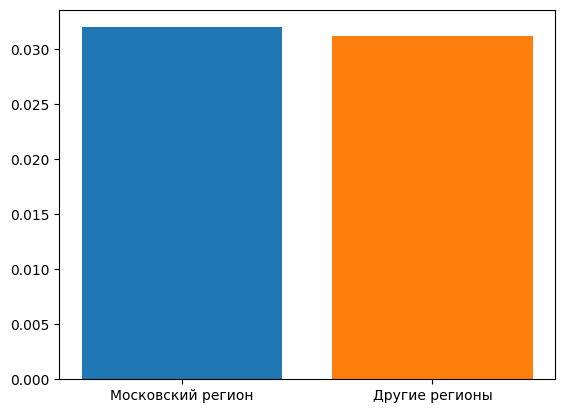

In [63]:
plt.bar('Московский регион', mos)
plt.bar('Другие регионы', oth);

На основании статистических тестов, разница в конверсии между Московским регионом и другими городами не является статистически значимым

## Из каких источников / кампаний / устройств / локаций к нам идёт самый целевой трафик (и с точки зрения объёма трафика, и с точки зрения CR)?

In [64]:
df.head()

,Unnamed: 0,session_id,target,client_id,visit_date,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,geo_country,geo_city,trafic
0,0,1000009318903347362.1632663668.1632663668,0,2.328328e+08,2021-09-26,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,PkybGvWbaqORmxjNunqZ,NaN,mobile,NaN,Samsung,Russia,Gelendzhik,paid
1,1,1000010177899156286.1635013443.1635013443,0,2.328330e+08,2021-10-23,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Samsung,Russia,Voronezh,org
2,2,1000013386240115915.1635402956.1635402956,0,2.328338e+08,2021-10-28,ZpYIoDJMcFzVoPFsHGJL,banner,gecBYcKZCPMcVYdSSzKP,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Samsung,Russia,Cherkessk,paid
3,3,1000017303238376207.1623489300.1623489300,0,2.328347e+08,2021-06-12,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Realme,Russia,Irkutsk,paid
4,4,1000020580299877109.1624943350.1624943350,0,2.328354e+08,2021-06-29,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Apple,Russia,Moscow,org


### Источники

In [65]:
source_1 = df.groupby('utm_source')['target'].sum()
source_1 = pd.DataFrame(source_1).reset_index()
source_1 = source_1.sort_values(by='target', ascending=False)
source_1

,utm_source,target
149,ZpYIoDJMcFzVoPFsHGJL,15998
176,fDLlAcSmythWSCVMvqvL,10531
210,kjsLglQLzykiRbcDiGcD,6293
156,bByPQxmDaMXgpHeypKSM,5557
5,BHcvLfOaCWvWTykYqHVe,3882
...,...,...
117,ULAUPJGgNiZYQgwZwZGR,0
120,VCREhgqUPSUkmfOTvGiW,0
121,VYDithpzdwvzdnmGEkfp,0
122,VdeFdoGCqZBxFfKSHNLl,0


In [66]:
source_0 = df.groupby('utm_source')['target'].count()
source_0 = pd.DataFrame(source_0).reset_index()
source_0

,utm_source,target
0,AHgbtEjTEsiUMJouiDYS,14
1,ANoZJgYuPrWNkAAchryx,11
2,ArbfvYgWhqxkzywKqpQf,19
3,AuJjYKxJakEqFnCmyFtz,3
4,BAZCuyHZnaPrMGOMrcCQ,1
...,...,...
275,zGUBrOvMRpLqBkJPUsYo,2
276,zPJpddwzkFqLMSYgtDqy,1
277,zhqxcsahQYAzJvRzebNp,28
278,zslzdtckVsyxcYqKBRRn,3


In [72]:
res_source = source_0.merge(source_1, on='utm_source')
res_source['CR'] = res_source['target_y']/res_source['target_x']
res_source = res_source.sort_values(by=['target_y', 'CR'], ascending=False)
res_source

,utm_source,target_x,target_y,CR
149,ZpYIoDJMcFzVoPFsHGJL,552555,15998,0.028953
176,fDLlAcSmythWSCVMvqvL,277060,10531,0.038010
210,kjsLglQLzykiRbcDiGcD,245178,6293,0.025667
156,bByPQxmDaMXgpHeypKSM,90356,5557,0.061501
5,BHcvLfOaCWvWTykYqHVe,110963,3882,0.034985
...,...,...,...,...
272,yjIcHowrPNcMWjOzgULE,1,0,0.000000
273,ysUnXJVzkMTkkmGifVJI,1,0,0.000000
275,zGUBrOvMRpLqBkJPUsYo,2,0,0.000000
276,zPJpddwzkFqLMSYgtDqy,1,0,0.000000


In [74]:
top = res_source.iloc[0:15]
top

,utm_source,target_x,target_y,CR
149,ZpYIoDJMcFzVoPFsHGJL,552555,15998,0.028953
176,fDLlAcSmythWSCVMvqvL,277060,10531,0.038010
210,kjsLglQLzykiRbcDiGcD,245178,6293,0.025667
156,bByPQxmDaMXgpHeypKSM,90356,5557,0.061501
5,BHcvLfOaCWvWTykYqHVe,110963,3882,0.034985
77,MvfHsxITijuriZxsqZqt,175831,2249,0.012791
153,aXQzDWsJuGXeBXexNHjc,29528,1827,0.061873
96,QxAxdyPLuQMEcrdZWdWb,45267,1404,0.031016
205,jaSOmLICuBzCFqHfBdRg,28288,401,0.014176
232,oZCzWSykfixnjMPDNjSU,2585,260,0.100580


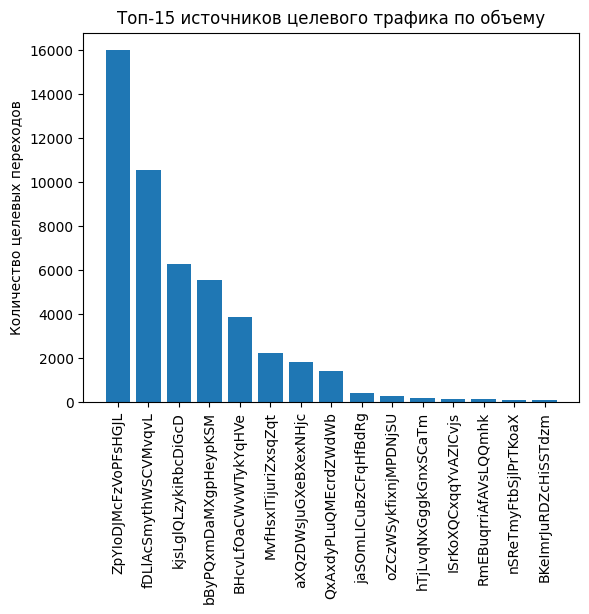

In [77]:
plt.bar(top['utm_source'], top['target_y'])
plt.xticks(rotation=90)
plt.ylabel('Количество целевых переходов')
plt.title("Топ-15 источников целевого трафика по объему");

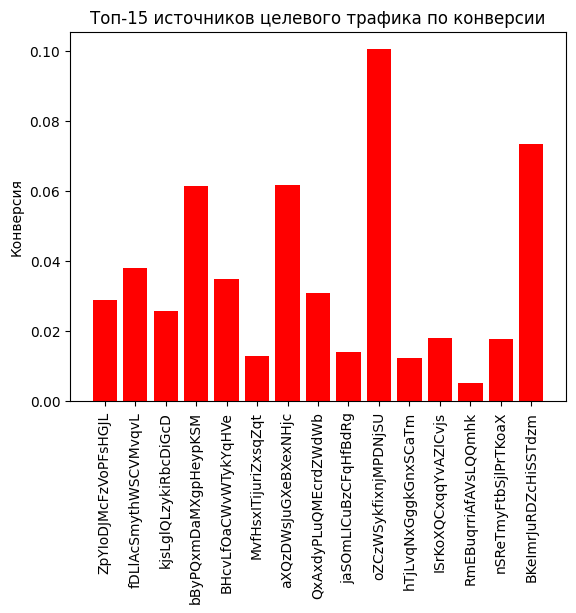

In [78]:
plt.bar(res_source['utm_source'], res_source['CR'], color = 'red')
plt.xticks(rotation=90)
plt.ylabel('Конверсия')
plt.title("Топ-15 источников целевого трафика по конверсии");

### Кампании

In [79]:
df.head()

,Unnamed: 0,session_id,target,client_id,visit_date,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,geo_country,geo_city,trafic
0,0,1000009318903347362.1632663668.1632663668,0,2.328328e+08,2021-09-26,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,PkybGvWbaqORmxjNunqZ,NaN,mobile,NaN,Samsung,Russia,Gelendzhik,paid
1,1,1000010177899156286.1635013443.1635013443,0,2.328330e+08,2021-10-23,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Samsung,Russia,Voronezh,org
2,2,1000013386240115915.1635402956.1635402956,0,2.328338e+08,2021-10-28,ZpYIoDJMcFzVoPFsHGJL,banner,gecBYcKZCPMcVYdSSzKP,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Samsung,Russia,Cherkessk,paid
3,3,1000017303238376207.1623489300.1623489300,0,2.328347e+08,2021-06-12,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Realme,Russia,Irkutsk,paid
4,4,1000020580299877109.1624943350.1624943350,0,2.328354e+08,2021-06-29,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Apple,Russia,Moscow,org


In [81]:
campaign_0 = df.groupby('utm_campaign')['target'].count()
campaign_0 = pd.DataFrame(campaign_0).reset_index()
campaign_0 = campaign_0.sort_values(by='target', ascending=False)
campaign_0


,utm_campaign,target
87,LTuZkdKfxRGVceoWkVyg,422992
84,LEoPHuyFvzoNfnzGgfcd,321286
39,FTjNLDyTrXaWYgZymFkV,234950
255,gecBYcKZCPMcVYdSSzKP,133247
192,XHNUiSKKGTEpSAlaVMFQ,23750
...,...,...
370,vgnFYqlaqdoLREHruWar,1
156,TwMQGFwDtGdibAEpQHYs,1
139,RkpOyeEPgcMBSDuHLQcj,1
378,wiaGHeLepWDNwXuBHvDB,1


In [82]:
campaign_1 = df.groupby('utm_campaign')['target'].sum()
campaign_1 = pd.DataFrame(campaign_1).reset_index()
campaign_1 = campaign_1.sort_values(by='target', ascending=False)
campaign_1

,utm_campaign,target
87,LTuZkdKfxRGVceoWkVyg,19006
84,LEoPHuyFvzoNfnzGgfcd,9348
255,gecBYcKZCPMcVYdSSzKP,4545
39,FTjNLDyTrXaWYgZymFkV,2447
347,sbJRYgVfvcnqKJNDDYIr,575
...,...,...
204,YflAKtEwXjstllfZgfhN,0
205,YlsczTIyBSwTLNtuDkCd,0
206,YpBKcihLLfFjWuxOLfvW,0
207,YwbyBjVdPyyaRwqdjxpq,0


In [85]:
res_campaign = campaign_0.merge(campaign_1, on='utm_campaign')
res_campaign["CR"] = res_campaign['target_y']/res_campaign['target_x']
res_campaign = res_campaign.sort_values(by=['target_y', 'CR'], ascending=False)
res_campaign_top = res_campaign.iloc[0:15]
res_campaign_top

,utm_campaign,target_x,target_y,CR
0,LTuZkdKfxRGVceoWkVyg,422992,19006,0.044932
1,LEoPHuyFvzoNfnzGgfcd,321286,9348,0.029096
3,gecBYcKZCPMcVYdSSzKP,133247,4545,0.034110
2,FTjNLDyTrXaWYgZymFkV,234950,2447,0.010415
5,sbJRYgVfvcnqKJNDDYIr,19942,575,0.028834
4,XHNUiSKKGTEpSAlaVMFQ,23750,401,0.016884
8,SgIUDYUKnyWHVowUOqid,15784,373,0.023632
7,LwJZxKuWmvOhPsaCeRjG,16846,285,0.016918
12,zxoiLxhuSIFrCeTLQVWZ,12234,270,0.022070
18,eimRuUrNhZLAYcwRrNXu,7724,258,0.033402


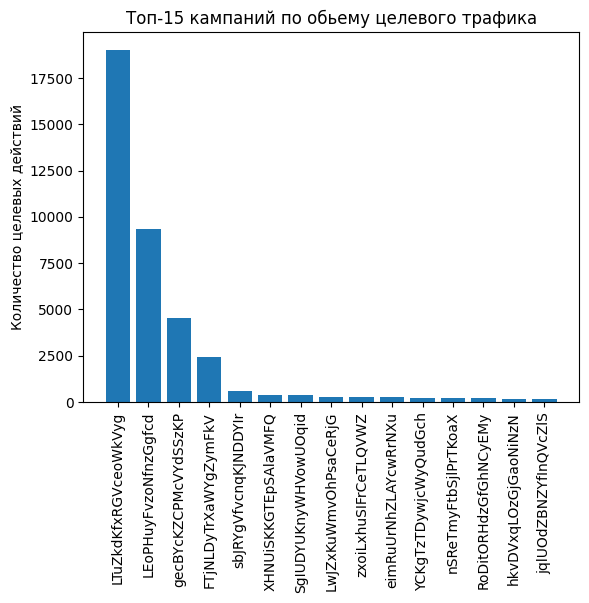

In [86]:
plt.bar(res_campaign_top['utm_campaign'], res_campaign_top['target_y'])
plt.xticks(rotation = 90)
plt.ylabel('Количество целевых действий')
plt.title('Топ-15 кампаний по обьему целевого трафика');

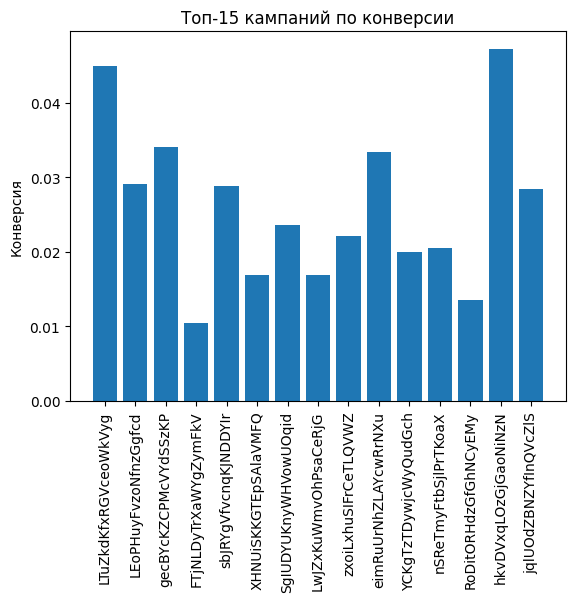

In [87]:
plt.bar(res_campaign_top['utm_campaign'], res_campaign_top['CR'])
plt.xticks(rotation=90)
plt.ylabel('Конверсия')
plt.title('Топ-15 кампаний по конверсии');

### Устройства

In [88]:
df.head()

,Unnamed: 0,session_id,target,client_id,visit_date,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,geo_country,geo_city,trafic
0,0,1000009318903347362.1632663668.1632663668,0,2.328328e+08,2021-09-26,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,PkybGvWbaqORmxjNunqZ,NaN,mobile,NaN,Samsung,Russia,Gelendzhik,paid
1,1,1000010177899156286.1635013443.1635013443,0,2.328330e+08,2021-10-23,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Samsung,Russia,Voronezh,org
2,2,1000013386240115915.1635402956.1635402956,0,2.328338e+08,2021-10-28,ZpYIoDJMcFzVoPFsHGJL,banner,gecBYcKZCPMcVYdSSzKP,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Samsung,Russia,Cherkessk,paid
3,3,1000017303238376207.1623489300.1623489300,0,2.328347e+08,2021-06-12,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Realme,Russia,Irkutsk,paid
4,4,1000020580299877109.1624943350.1624943350,0,2.328354e+08,2021-06-29,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Apple,Russia,Moscow,org


In [89]:
device_0 = df.groupby('device_category')['target'].count()
device_0 = pd.DataFrame(device_0).reset_index()
device_0

,device_category,target
0,desktop,346891
1,mobile,1368679
2,tablet,16696


In [90]:
device_1 = df.groupby('device_category')['target'].sum()
device_1 = pd.DataFrame(device_1).reset_index()
device_1


,device_category,target
0,desktop,11513
1,mobile,38379
2,tablet,422


In [91]:
res_device = device_0.merge(device_1, on='device_category')
res_device['CR'] = res_device['target_y']/res_device['target_x']
res_device


,device_category,target_x,target_y,CR
0,desktop,346891,11513,0.033189
1,mobile,1368679,38379,0.028041
2,tablet,16696,422,0.025276


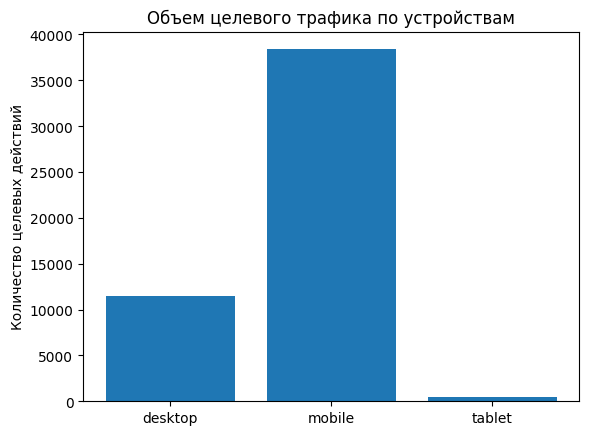

In [92]:
plt.bar(res_device['device_category'], res_device['target_y'])
plt.ylabel('Количество целевых действий')
plt.title('Объем целевого трафика по устройствам');

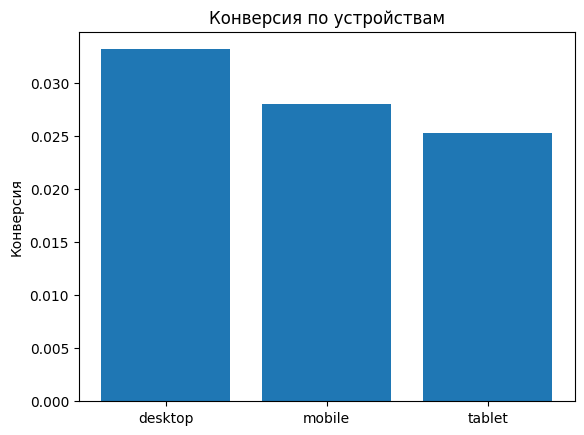

In [93]:
plt.bar(res_device['device_category'], res_device['CR'])
plt.ylabel('Конверсия')
plt.title('Конверсия по устройствам');

### Локации

In [94]:
geo = df.groupby('geo_city')['target'].count()
geo = pd.DataFrame(geo).reset_index()
geo

,geo_city,target
0,'s-Hertogenbosch,2
1,(not set),73297
2,10th of Ramadan City,10
3,12214,2
4,13403,15
...,...,...
2384,Zwickau,2
2385,Zwolle,3
2386,Тарасовка,26
2387,Тимофеевка,18


In [95]:
geo_1 = df.groupby('geo_city')['target'].sum()
geo_1 = pd.DataFrame(geo_1).reset_index()
geo_1 = geo_1.sort_values(by='target', ascending=False)
geo_1

,geo_city,target
1346,Moscow,23629
1811,Saint Petersburg,7113
1,(not set),1588
937,Kazan,1139
1040,Krasnodar,1081
...,...,...
871,Jakobsberg,0
869,Jacksonville,0
867,Izmail,0
865,Iver,0


In [99]:
res_geo = geo.merge(geo_1, on='geo_city')
res_geo['CR'] = res_geo['target_y']/res_geo['target_x']
res_geo = res_geo.sort_values(by=['target_y', 'CR'], ascending=False)
res_geo = res_geo.iloc[0:15]
res_geo

,geo_city,target_x,target_y,CR
1346,Moscow,750928,23629,0.031466
1811,Saint Petersburg,278402,7113,0.025549
1,(not set),73297,1588,0.021665
937,Kazan,27689,1139,0.041135
1040,Krasnodar,30260,1081,0.035724
2329,Yekaterinburg,33555,887,0.026434
1829,Samara,23433,727,0.031025
2159,Ufa,20283,639,0.031504
1447,Nizhny Novgorod,20782,559,0.026898
1485,Novosibirsk,20115,509,0.025304


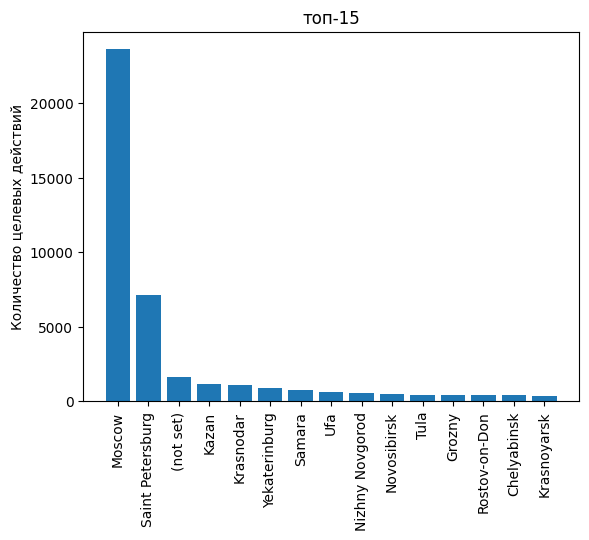

In [100]:
plt.bar(res_geo['geo_city'], res_geo['target_y'])
plt.xticks(rotation = 90)
plt.ylabel('Количество целевых действий')
plt.title('топ-15');



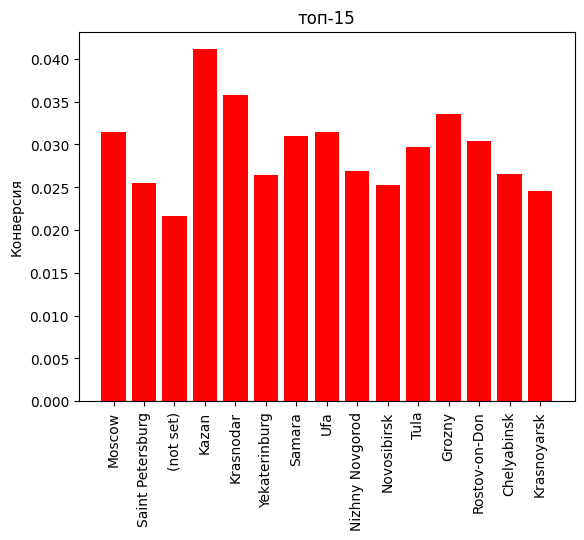

In [101]:
plt.bar(res_geo['geo_city'], res_geo['CR'], color='red')
plt.xticks(rotation = 90)
plt.ylabel('Конверсия')
plt.title('топ-15');

### Какие авто пользуются наибольшим спросом? У каких авто самый лучший показатель CR (Conversion Rate) в целевые события?

In [111]:
df_car = pd.read_csv("C:\\Users\\lenovo\\final\\df")

In [112]:
df_car[['brand', 'model']] = df_car['hit_page_path'].str.extract(r'sberauto\.com/cars/all/(\w+)/(\w+)/')

In [114]:
df_car.brand.value_counts(dropna=False)

brand
NaN           13470652
skoda           742080
volkswagen      413015
kia             235296
nissan          150815
renault         147796
toyota          134411
bmw              84806
porsche          63058
lexus            61631
volvo            51598
haval            51531
audi             42463
mini             34709
peugeot          27170
hyundai          15439
Name: count, dtype: int64

In [115]:
df_car['brand'] = df_car.brand.fillna('other')

In [117]:
car_0 = df_car.groupby('brand')['target'].count()
car_0 = pd.DataFrame(car_0).reset_index()
car_0

,brand,target
0,audi,42463
1,bmw,84806
2,haval,51531
3,hyundai,15439
4,kia,235296
5,lexus,61631
6,mini,34709
7,nissan,150815
8,other,13470652
9,peugeot,27170


In [119]:
car_1 = df_car.groupby('brand')['target'].sum()
car_1 = pd.DataFrame(car_1).reset_index()
car_1

,brand,target
0,audi,127
1,bmw,260
2,haval,582
3,hyundai,204
4,kia,2694
5,lexus,259
6,mini,70
7,nissan,771
8,other,83671
9,peugeot,128


In [130]:
res_car = car_0.merge(car_1, on='brand')
res_car['CR'] = res_car['target_y']/res_car['target_x']
res_car = res_car.sort_values(by='CR', ascending=False)
res_car

,brand,target_x,target_y,CR
3,hyundai,15439,204,0.013213
14,volkswagen,413015,4864,0.011777
4,kia,235296,2694,0.011449
13,toyota,134411,1535,0.011420
2,haval,51531,582,0.011294
12,skoda,742080,8085,0.010895
11,renault,147796,1300,0.008796
8,other,13470652,83671,0.006211
7,nissan,150815,771,0.005112
15,volvo,51598,246,0.004768


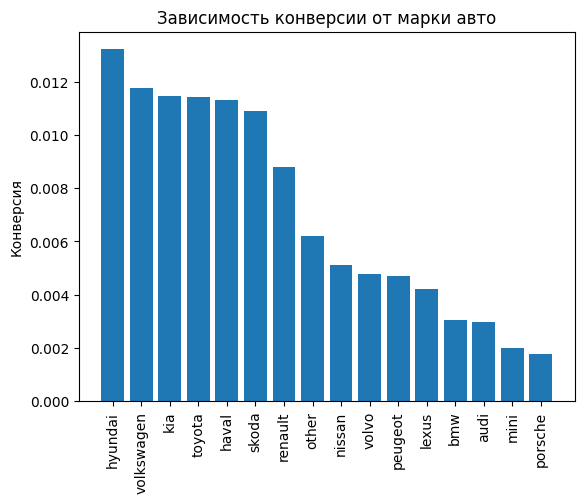

In [131]:
plt.bar(res_car['brand'], res_car['CR'])
plt.xticks(rotation = 90)
plt.ylabel('Конверсия')
plt.title('Зависимость конверсии от марки авто');

### Соцсети

In [40]:
df.utm_medium.value_counts()


utm_medium
banner               525206
cpc                  399395
(none)               277060
cpm                  229791
referral             136851
organic               55009
email                 28287
push                  27710
stories               10472
cpv                    7815
blogger_channel        7731
smartbanner            6501
blogger_stories        4226
tg                     3920
cpa                    3266
post                   2227
outlook                1269
app                    1211
smm                    1194
clicks                  908
blogger_header          760
(not set)               405
info_text               335
sms                     194
landing                 127
partner                  95
link                     52
cbaafe                   43
CPM                      36
yandex_cpc               31
vk_smm                   25
static                   17
google_cpc               15
article                  15
web_polka                11
medium   

In [41]:
soc = df['utm_medium'].unique().tolist()
soc

['cpm',
 '(none)',
 'banner',
 'cpc',
 'email',
 'organic',
 'cpa',
 'referral',
 'stories',
 'cpv',
 'push',
 'blogger_stories',
 'tg',
 'blogger_channel',
 'smartbanner',
 'blogger_header',
 'post',
 'app',
 'smm',
 nan,
 'outlook',
 'info_text',
 '(not set)',
 'clicks',
 'vk_smm',
 'static',
 'sms',
 'google_cpc',
 'partner',
 'cbaafe',
 'Sbol_catalog',
 'fb_smm',
 'landing',
 'landing_interests',
 'yandex_cpc',
 'web_polka',
 'ok_smm',
 'linktest',
 'article',
 'sber_app',
 'CPM',
 'medium',
 'tablet',
 'promo_sbol',
 'reach',
 'dom_click',
 'nkp',
 'social',
 'catalogue',
 'main_polka',
 'last',
 'link',
 'users_msk',
 'qrcodevideo',
 'promo_sber',
 'qr']

In [46]:
words = [soc]

In [54]:

med = lambda x: if 'smm' in x, words

med

SyntaxError: invalid syntax (1234961088.py, line 1)

In [65]:
med = []
i = 'smm'
for word in words:
    if i in word:
        med.append(i)
        
return(med)
     

SyntaxError: 'return' outside function (2621407700.py, line 7)